In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
print(data['diagnosis'])
data['diagnosis'] = data['diagnosis'].replace(['M'],1)
data['diagnosis'] = data['diagnosis'].replace(['B'],0)
y = data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Benign:  357
Number of Malignant :  212


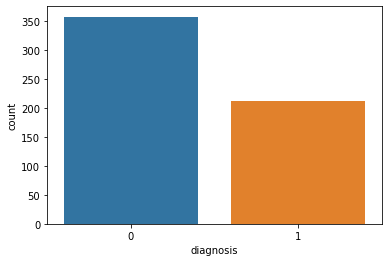

In [6]:
ax = sn.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

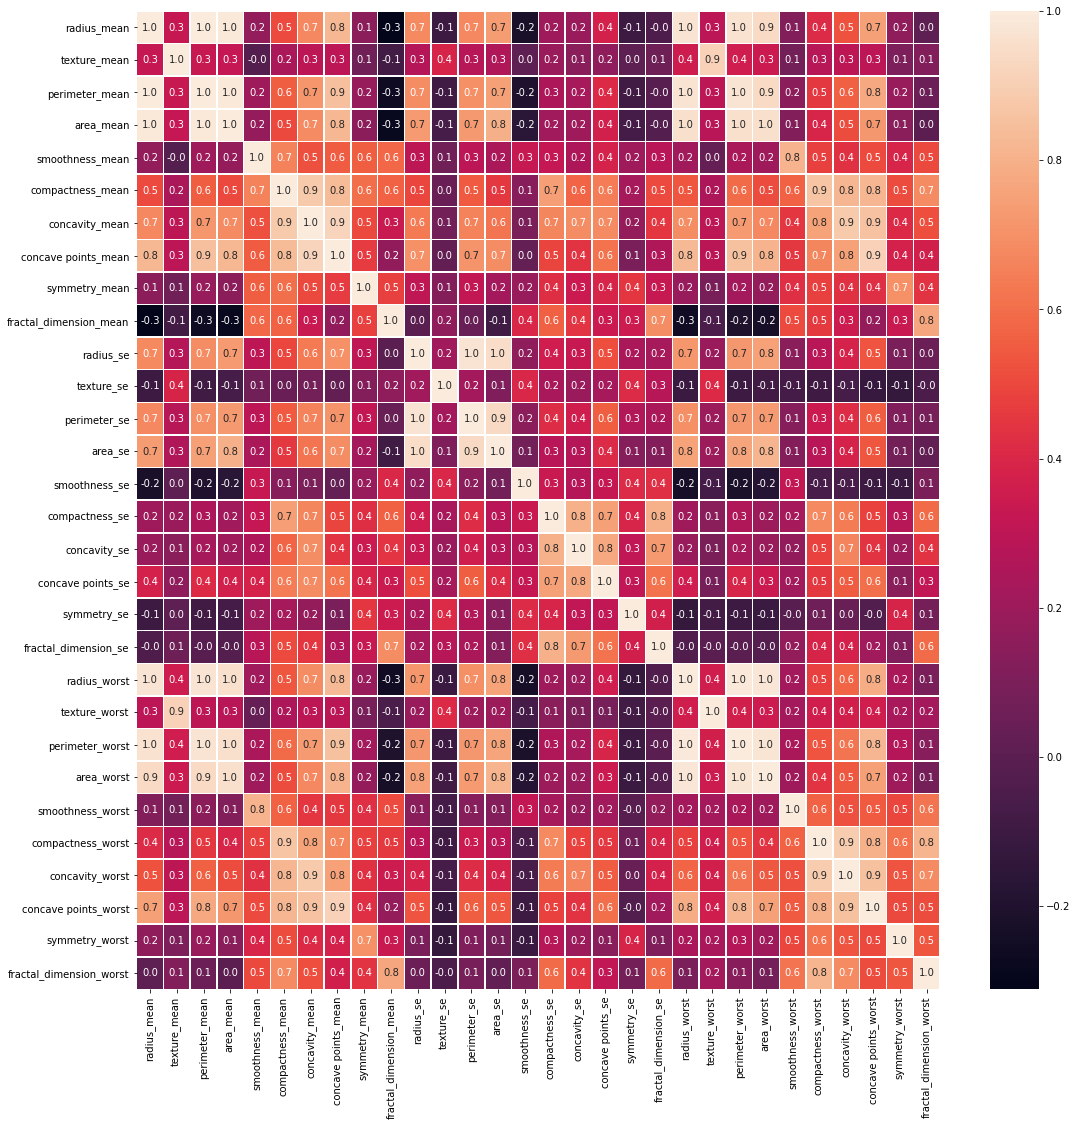

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )         
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

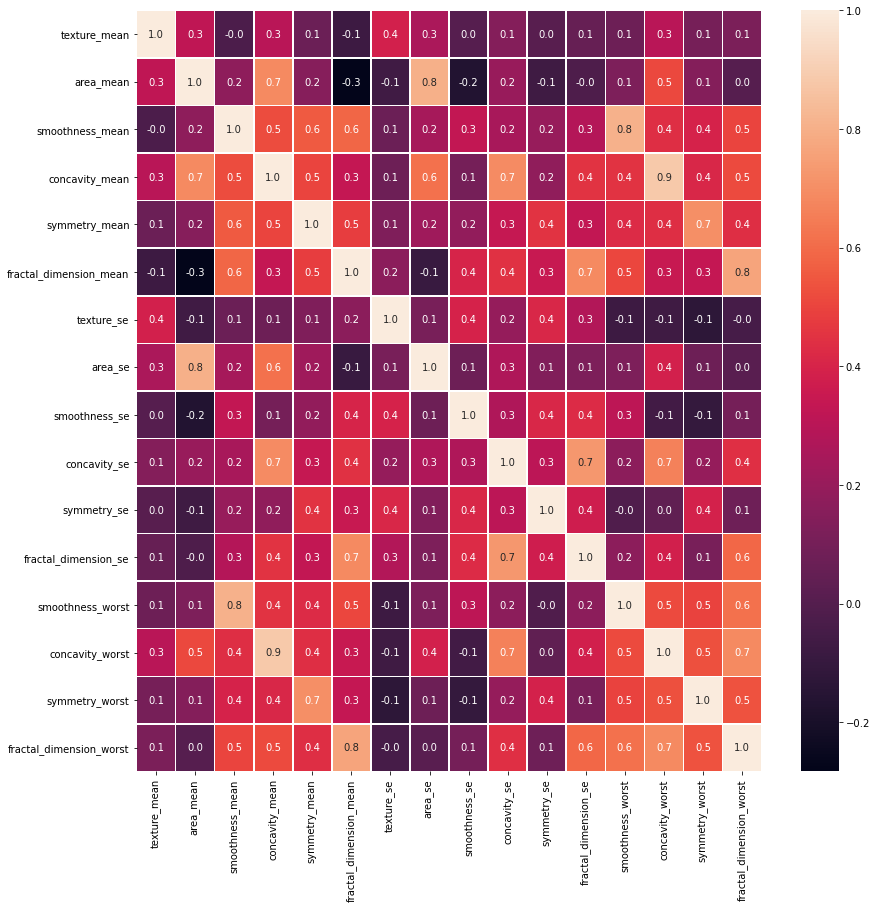

In [11]:
f,ax = plt.subplots(figsize=(14, 14))
sn.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [12]:
x_1.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.30, random_state = 0)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

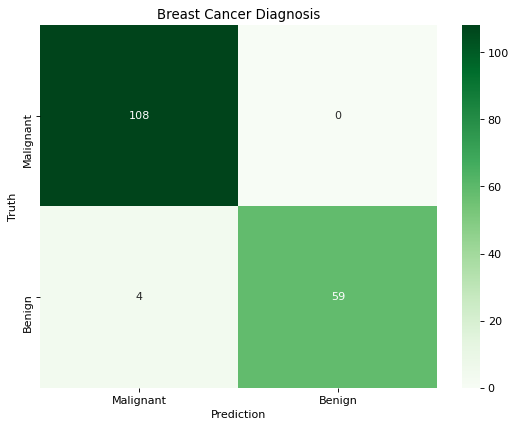

Accuracy of Support Vector Classifier: 97.6608187134503 

Accuracy of Support Vector Classifier in training set: 98.49246231155779 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [15]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_predictedtrain = svc.predict(X_train)
svc_acc_scoretrain = accuracy_score(y_train, svc_predictedtrain)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(svc_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("Accuracy of Support Vector Classifier in training set:",svc_acc_scoretrain*100,'\n')

print(classification_report(y_test,svc_predicted))

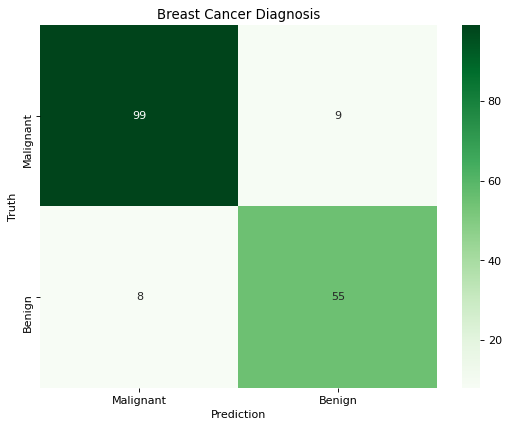

Accuracy of Naive Bayes model: 90.05847953216374 

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       108
           1       0.86      0.87      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [16]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(nb_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

features_inputs = tf.keras.Input((16, ), dtype=tf.float16)
    
feature_x = layers.Dense(256, activation='relu')(features_inputs)
feature_x = layers.Dropout(0.1)(feature_x)
feature_x = layers.Reshape((-1,1))(feature_x)
feature_x = layers.Conv1D(filters=16, kernel_size=4, strides=1, padding='same')(feature_x)
feature_x = layers.BatchNormalization()(feature_x)
feature_x = layers.LeakyReLU()(feature_x)
feature_x = layers.Conv1D(filters=16, kernel_size=4, strides=4, padding='same')(feature_x)
feature_x = layers.BatchNormalization()(feature_x)
feature_x = layers.LeakyReLU()(feature_x)
feature_x = layers.Conv1D(filters=64, kernel_size=4, strides=1, padding='same')(feature_x)
feature_x = layers.BatchNormalization()(feature_x)
feature_x = layers.LeakyReLU()(feature_x)
feature_x = layers.Conv1D(filters=64, kernel_size=4, strides=4, padding='same')(feature_x)
feature_x = layers.BatchNormalization()(feature_x)
feature_x = layers.LeakyReLU()(feature_x)
feature_x = layers.Conv1D(filters=64, kernel_size=4, strides=2, padding='same')(feature_x)
feature_x = layers.BatchNormalization()(feature_x)
feature_x = layers.LeakyReLU()(feature_x)
feature_x = layers.Flatten()(feature_x)
    
x = layers.Dense(512, activation='relu', kernel_regularizer="l2")(feature_x)
    
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer="l2")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer="l2")(x)
x = layers.Dropout(0.1)(x)
output = layers.Dense(1)(x)
model = tf.keras.Model(inputs=[features_inputs], outputs=[output])
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
epochs = 100
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))
test_loss,test_accuracy = model.evaluate(X_test,y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 256, 16)           80        
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 16)           64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 16)           0     

In [18]:
from tensorflow import keras
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 256, 16)           80        
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 16)           64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 16)           0     

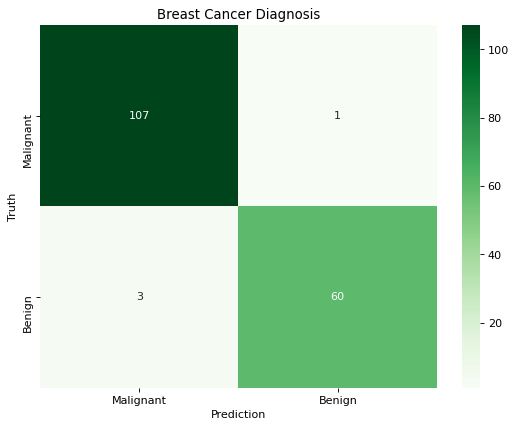

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [19]:
predict = model.predict(X_test)
for i in range(len(predict)):
    if(predict[i]>0.5):
        predict[i]=1
    else:
        predict[i]=0


conf_arr = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(conf_arr, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print(classification_report(y_test,predict))

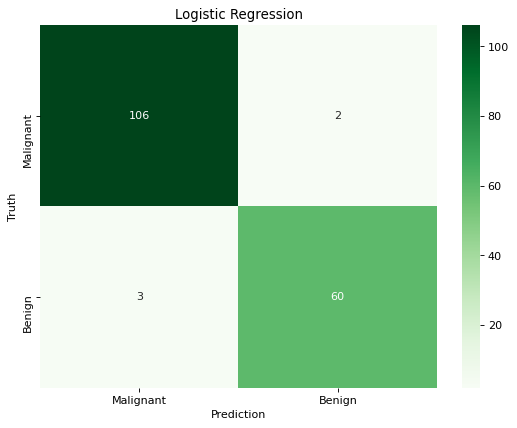

Accuracy of Logistic Regression: 97.07602339181285 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [20]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(lr_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Logistic Regression')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

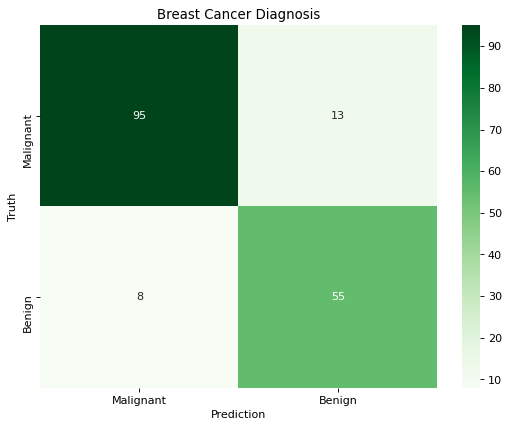

Accuracy of Random Forest: 87.71929824561403 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       108
           1       0.81      0.87      0.84        63

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.87       171
weighted avg       0.88      0.88      0.88       171



In [21]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=4, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(rf_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

{'n_neighbors': 18}
0.8981527893808595


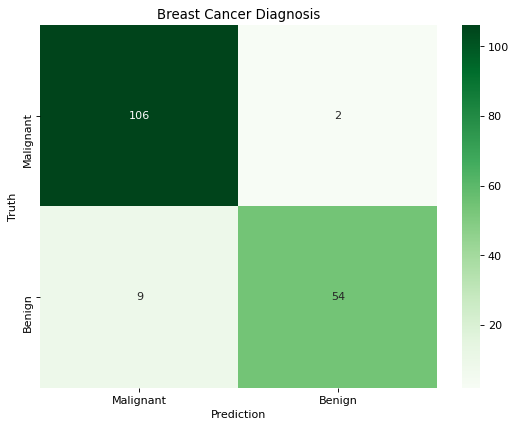

Accuracy of K-NeighborsClassifier: 93.56725146198829 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       108
           1       0.96      0.86      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [22]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=3)
knn_gscv.fit(x_1, y)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(knn_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

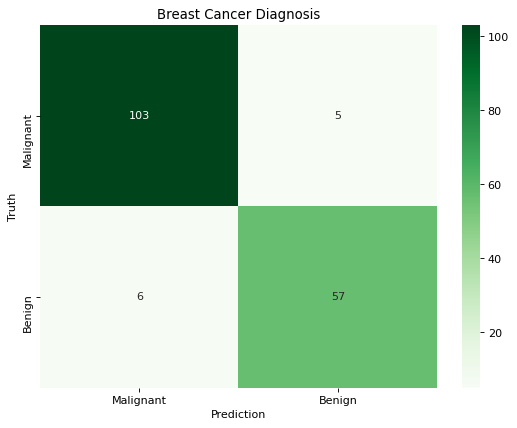

Accuracy of DecisionTreeClassifier: 93.56725146198829 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [23]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sn.heatmap(dt_conf_matrix, cmap="Greens", annot=True, fmt='d', xticklabels= [ 'Malignant','Benign'],
                yticklabels=['Malignant', 'Benign'])
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

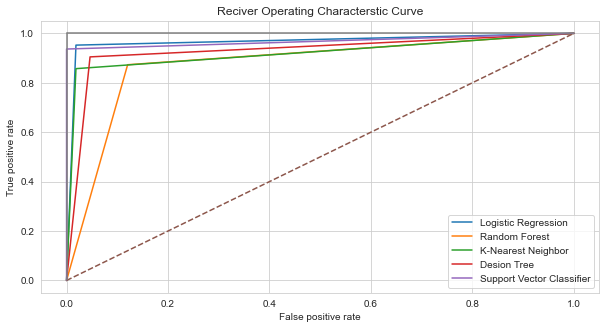

In [24]:
dnn_false_positive_rate,dnn_true_positive_rate,svc_threshold = roc_curve(y_test,predict)
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sn.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [25]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,97.076023
1,Random Forest,87.719298
2,K-Nearest Neighbour,93.567251
3,Decision Tree,93.567251
4,Support Vector Machine,97.660819


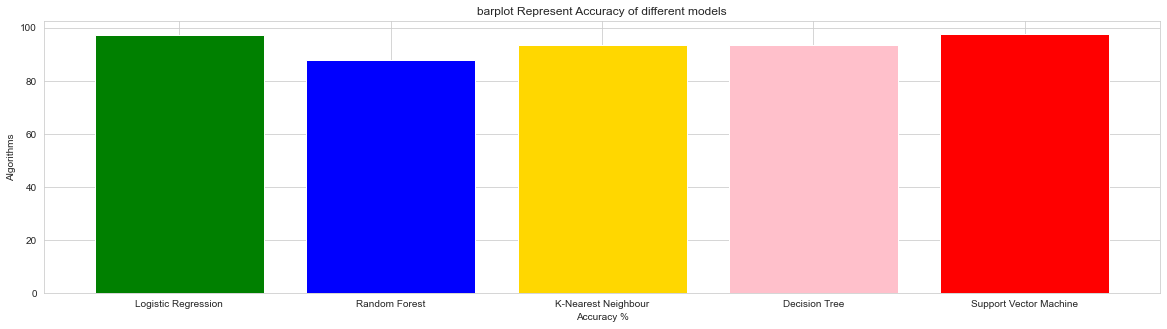

In [26]:
colors = ['green','blue','gold','pink','red']
plt.figure(figsize=(20,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

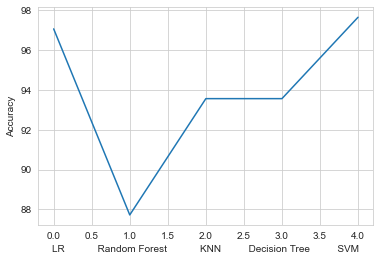

In [28]:
plt.plot([97.076023 , 87.719298 ,93.567251 ,93.567251,97.660819])
plt.ylabel('Accuracy')
plt.xlabel("LR            Random Forest            KNN          Decision Tree          SVM")
plt.show

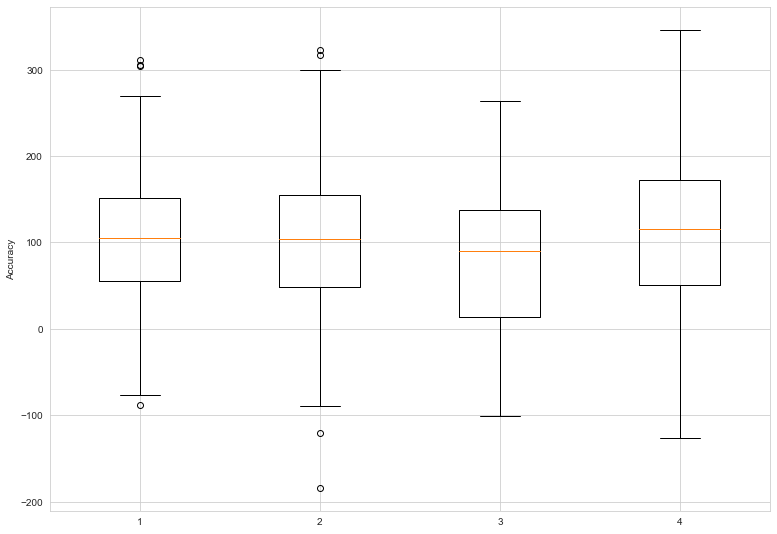

In [27]:
np.random.seed(10)

data_1 = np.random.normal(97 , 87 ,93)
data_2 = np.random.normal(93 ,93,97)
data_3 = np.random.normal(87 ,93 ,93)
data_4 = np.random.normal(97,93,97)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
plt.ylabel('Accuracy')
# show plot
plt.show()